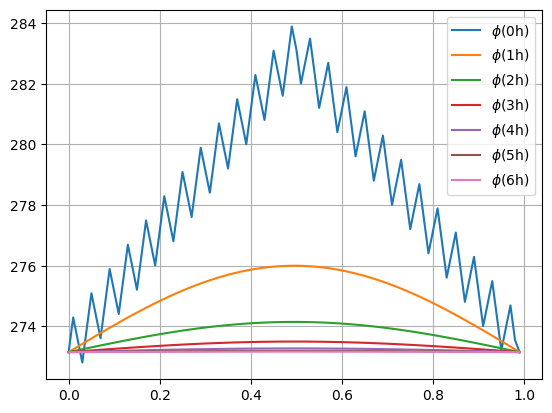

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# function
def funcDiff(x):
    if x > .5:
        return 273.15 + 20 - 20*x + np.sin(50*np.pi*x)
    else:
        return 273.15 + 20*x + np.sin(50*np.pi*x)
fdv = np.vectorize(funcDiff)

# scheme
def diffusion(x0, y0, k, dt, dx, tinterval, duration, dboundary):
    mult = k*dt/dx**2
    t = 0; sz = len(x0)
    while t < duration:
        y0 =  mult*(np.roll(y0, -1) - 2*y0 + np.roll(y0, 1)) + y0
        y0[0] = dboundary #dirichlet boundary
        y0[sz-1] = dboundary
        if t % tinterval < dt:
            plt.plot(x0, y0, label="$\phi$(" + str(int(np.floor(t/3600))) + "h)")
        t = t + dt
    plt.legend()
    plt.grid()

# initial condition
dt = 0.1; k = 2.9e-5; dx = 0.01
dboundary = 273.15
x0 = np.arange(0, 1, dx)
y0 = fdv(x0)
sz = len(x0); y0[0] = dboundary; y0[sz-1] = dboundary
tinterval = 3600
duration = 3600*6 + 10

# run
diffusion(x0, y0, k, dt, dx, tinterval, duration, dboundary)


    